<a href="https://colab.research.google.com/github/kanjamwingirwa/hypothyoidismPreiction/blob/main/Hypothyroidism_Prediction_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the Question**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# **Defining the Metric for Sucess**

A model of at least 80% accuracy. Compare the different models 

# **Understanding the Context**

There are many factors that predispose one to hypothyroidism. This analysis will build a model on whether one is diagnosed with hypothyrooism gicen the various factors 

# **Recording the Experimental Design**
1. Data cleaning and preparation

2. Exploratory Data Analysis

3. Modelling: Decision trees and Support Vector Machines
4. Conclusions

In [55]:
#we begin by importing the general libraries
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
#load and preview the dataset
hypo_df = pd.read_csv('hypothyroid.csv')
hypo_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [33]:
#preview the tail as well 
hypo_df.tail(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [34]:
# Let's determine the number of rows and columns in our dataset

print('This dataset has',hypo_df.shape[0],'rows and',hypo_df.shape[1],'columns')

This dataset has 3163 rows and 26 columns


In [35]:
#check out the info of the data sets
hypo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [36]:
#check for any null values in the data set
hypo_df.isna().sum()
#this insinuates that the data does not have null values and yet we can see some '?'

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [37]:
#let's check for unique values
for col in hypo_df:
  print(hypo_df[col].unique())

['hypothyroid' 'negative']
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
['M' 'F' '?']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['y' 'n']
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50'
 '14' '60' '1

Looking at the above output there are several question marks in the data set. These will have to be dealt with accordingly.

In [38]:
#replace '?' with Nan in order to fillna
ht_df = hypo_df.replace('?',np.NaN)
ht_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [39]:
#let's check for unique values again
for col in ht_df:
  print(ht_df[col].unique())

['hypothyroid' 'negative']
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
['M' 'F' nan]
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['f' 't']
['y' 'n']
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' nan '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6.50' '20' '7.50'
 '14' '60' '1

In [40]:
#first we have to change the columns into either numerical or categorical in order to fill the nan values
cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
ht_df[cols]= ht_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [41]:
#we then identify categorical variables and identify them as such
cols2= ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid','pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured','TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
ht_df[cols2]= ht_df[cols2].astype('category')

In [42]:
#check out the info of the data sets to see if the change has been implemented
ht_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3163 non-null   object  
 1   age                        2717 non-null   float64 
 2   sex                        3090 non-null   category
 3   on_thyroxine               3163 non-null   category
 4   query_on_thyroxine         3163 non-null   category
 5   on_antithyroid_medication  3163 non-null   category
 6   thyroid_surgery            3163 non-null   object  
 7   query_hypothyroid          3163 non-null   category
 8   query_hyperthyroid         3163 non-null   category
 9   pregnant                   3163 non-null   category
 10  sick                       3163 non-null   category
 11  tumor                      3163 non-null   category
 12  lithium                    3163 non-null   category
 13  goitre                     3163 n

In [43]:
#let's check again for null values
ht_df.isna().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [44]:
#let's drop the TBG column since it has too many NaN vaues
ht_df= ht_df.drop(['TBG'], axis=1)
ht_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [45]:
ht_df.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [46]:

#depending on the column, let's replace the nan values
ht_df['age'].fillna((ht_df['age'].mean()), inplace=True)

In [47]:
ht_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [48]:
ht_df['age'].unique()

array([72.        , 15.        , 24.        , 77.        , 85.        ,
       64.        , 20.        , 42.        , 69.        , 75.        ,
       53.        , 59.        , 68.        , 50.        , 78.        ,
       65.        , 28.        , 43.        , 40.        , 84.        ,
       51.15421421, 83.        , 63.        , 73.        , 36.        ,
       27.        , 48.        , 71.        , 60.        , 34.        ,
       79.        , 62.        , 74.        , 32.        , 41.        ,
       70.        , 29.        ,  5.        , 58.        , 35.        ,
       51.        , 22.        , 16.        , 44.        , 39.        ,
       47.        , 18.        , 17.        , 88.        , 56.        ,
       30.        , 45.        , 66.        , 52.        , 54.        ,
       80.        , 33.        , 38.        , 92.        , 67.        ,
       46.        , 13.        , 89.        , 61.        , 49.        ,
       26.        , 57.        , 31.        , 90.        , 81.  

In [49]:
ht_df['sex'].fillna((ht_df['sex'].mode()), inplace=True)

In [112]:
#replace the rest with 0
ht_df=ht_df.replace(np. nan,0) 

In [104]:
#check for duplicates
ht_df.duplicated().sum()

152

In [105]:
#let's drop the duplicates
ht_df.drop_duplicates()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,0,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,58.0,0,0,0,0,0,0,0,0,0,0,0,0,1,5.8,1,1.7,1,86.0,1,0.91,1,95.0,0
3159,1,29.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.8,1,1.8,1,99.0,1,1.01,1,98.0,0
3160,1,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,0.6,1,71.0,1,0.68,1,104.0,0
3161,1,74.0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.3,1,0.1,1,65.0,1,0.48,1,137.0,0


In [74]:
ht_df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n


In [75]:
ht_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

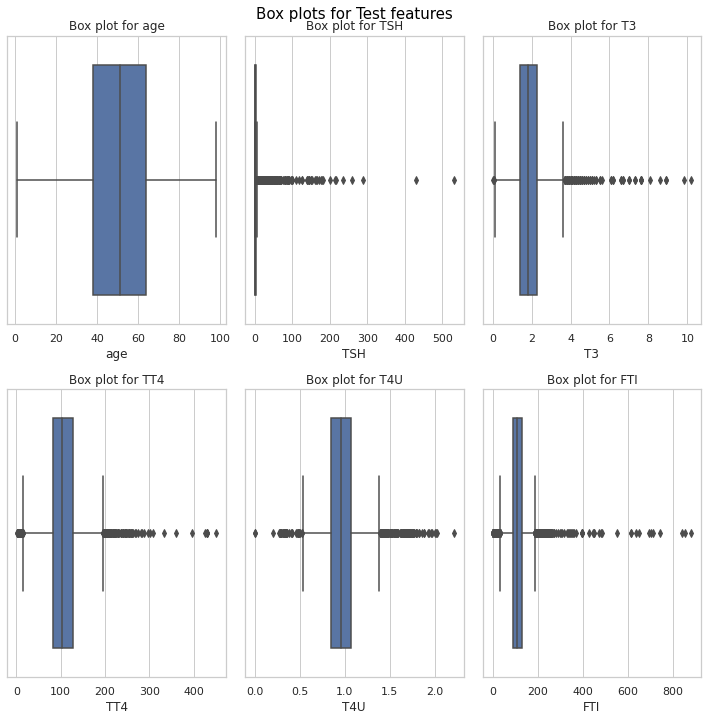

In [77]:
# We will use a boxplot to check for outliers for the numerical features
columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))

# labeling the title
fig.suptitle('Box plots for Test features', y= 1, color = 'black', fontsize = 15)

sb.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), ht_df, columns):
  sb.boxplot(ht_df[name], ax = ax)
  ax.set_title('Box plot for '+ name)
plt.tight_layout()  
plt.show()


There are several outliers but none will be eliminated as we want to see their relationship with hypothyroism.  A quick google search reveals that T3,T4,TSH,FTI and TFU are some of the indications that show whether one has hypothyroidism or not. High levels of these will are indicators of hypothyroidism, thus, it would be incorrect to drop the extreme values since these very values are the ones that will bring out who has hypothyroidism

In [78]:
#get an overview of descriptive data analysis of the numerical data
ht_df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3163.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,17.881969,23.899467,0.996773,45.485419,0.226580,60.239572
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,51.154214,0.700000,1.800000,104.000000,0.960000,107.000000
75%,64.000000,2.300000,2.300000,128.000000,1.065000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


# **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

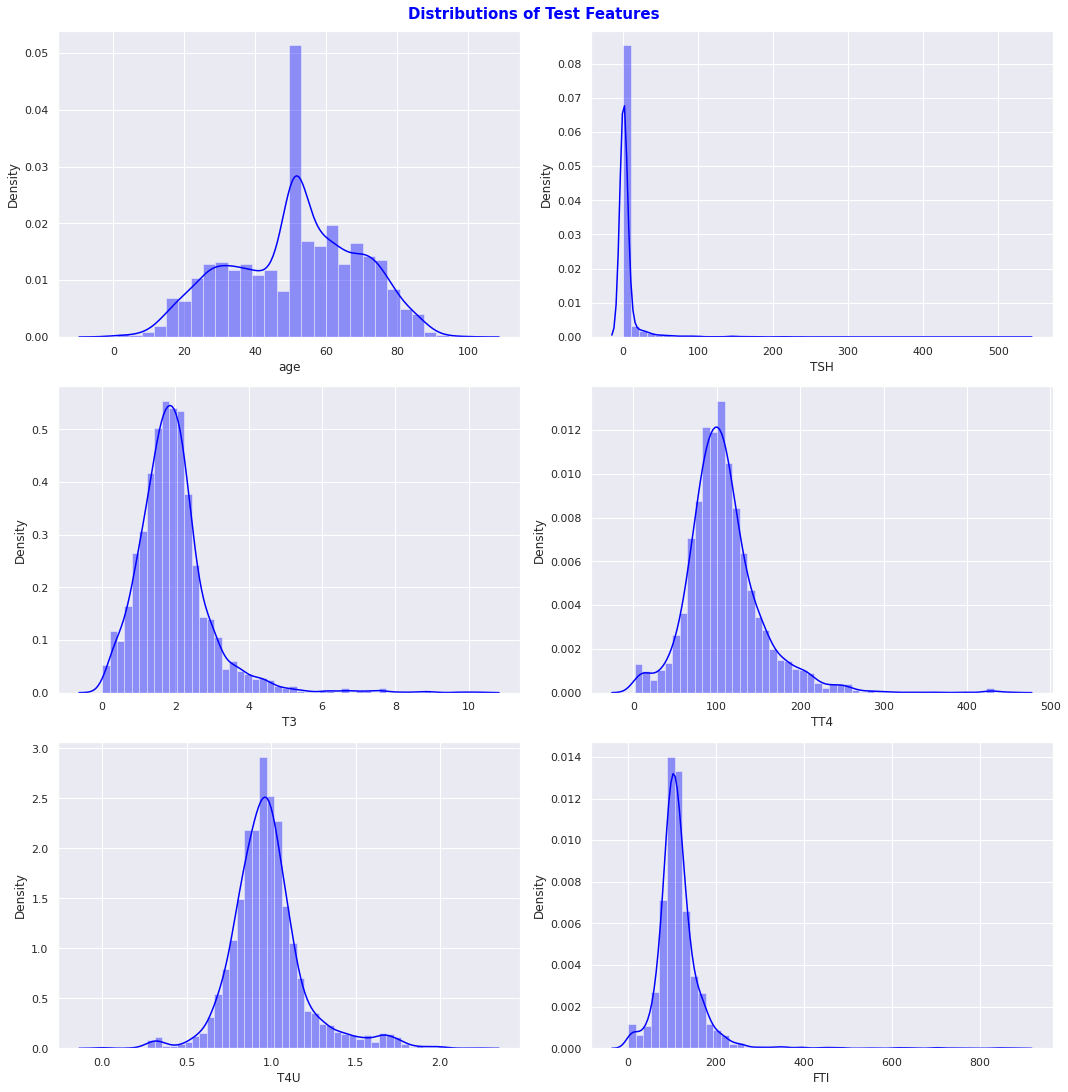

In [81]:
# Histograms of the columns


#visualizing the distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (15, 15))
fig.suptitle('Distributions of Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')
for ax, data, name in zip(axes.flatten(), ht_df, columns):
  sb.distplot(ht_df[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

A lot of the variables, except TSH seems to follow a normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


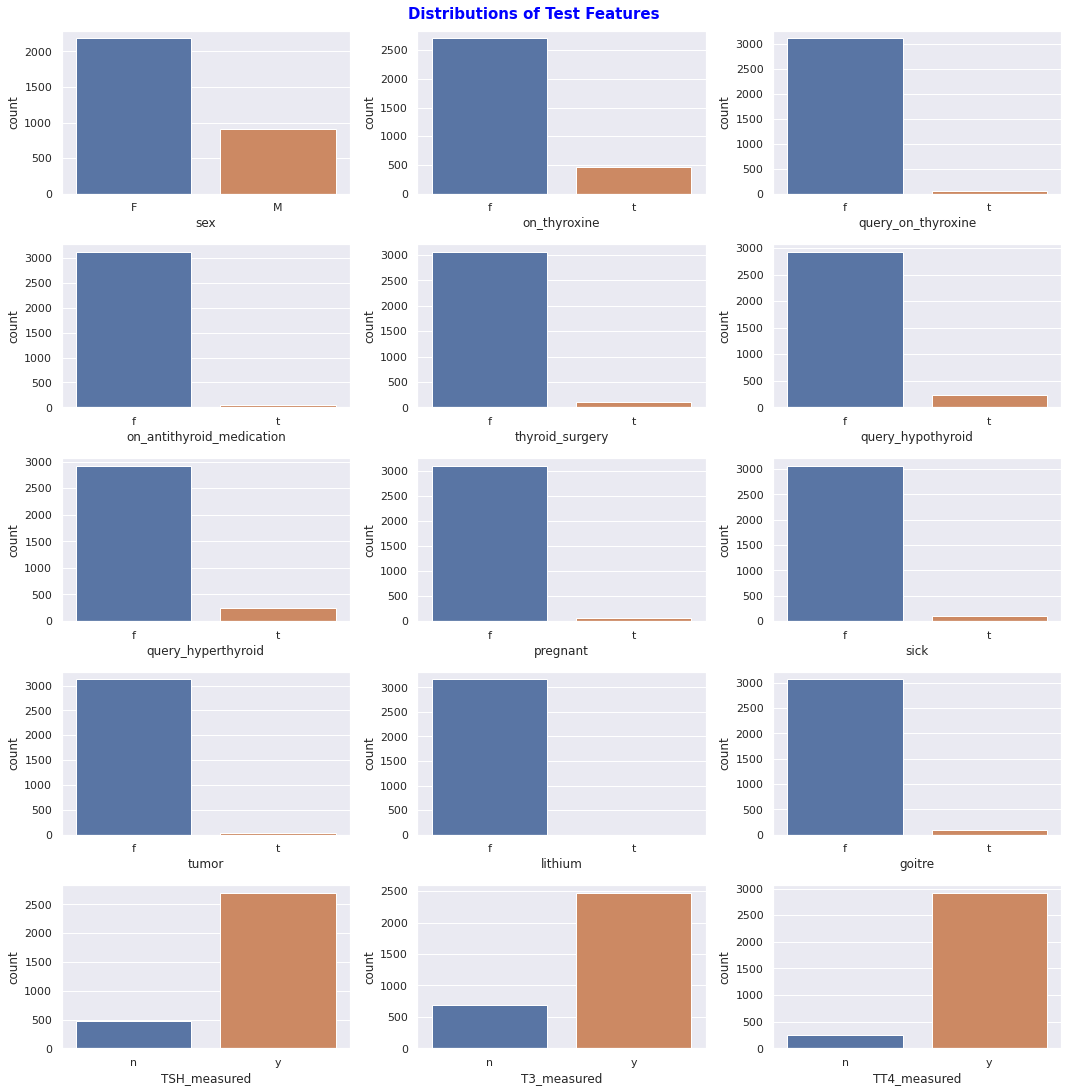

In [88]:
cols2= ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid','pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured','TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured']
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=5, ncols = 3, figsize = (15, 15))
fig.suptitle('Distributions of Test Features', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')
for ax, data, name in zip(axes.flatten(), ht_df, cols2):
  sb.countplot(ht_df[name], ax = ax)
plt.tight_layout()
plt.show()

From the above, we can deduce that; 

1. More females than males were tested. 

2. Most of those tested were not on any of the medications listed and had not gone through surgery

3. Many were not sick, had no tumor or goitre

4. Majority had had their TSH,T3 and TT4 measured

# **Bivariate Analysis**

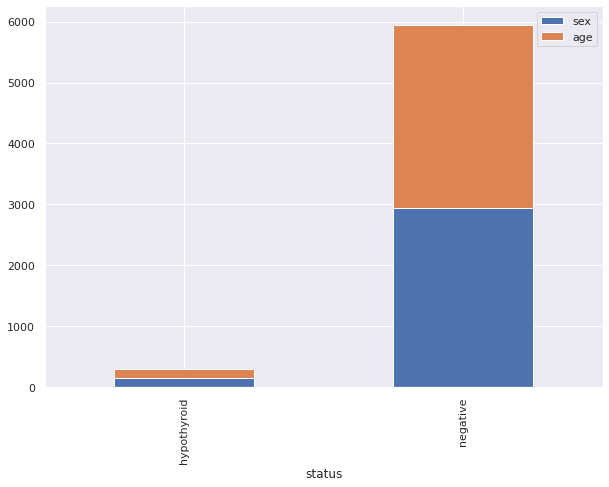

In [92]:
x= ht_df[['sex', 'status', 'age']]
y= x.set_index('status')
z=y.groupby('status').count()


z.plot.bar(stacked=True, figsize = [10,7])

People diagnosed with hypothyroid were of about the same, both in terms of gender and age. 

In [93]:
#let's check or multicollinearity
corr = ht_df.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.008164,-0.306290,-0.095578,-0.203889,0.016193
TSH,-0.008164,1.000000,-0.187229,-0.321945,0.071171,-0.265294
T3,-0.306290,-0.187229,1.000000,0.602734,0.410819,0.328370
TT4,-0.095578,-0.321945,0.602734,1.000000,0.322862,0.684969
T4U,-0.203889,0.071171,0.410819,0.322862,1.000000,-0.283284
FTI,0.016193,-0.265294,0.328370,0.684969,-0.283284,1.000000


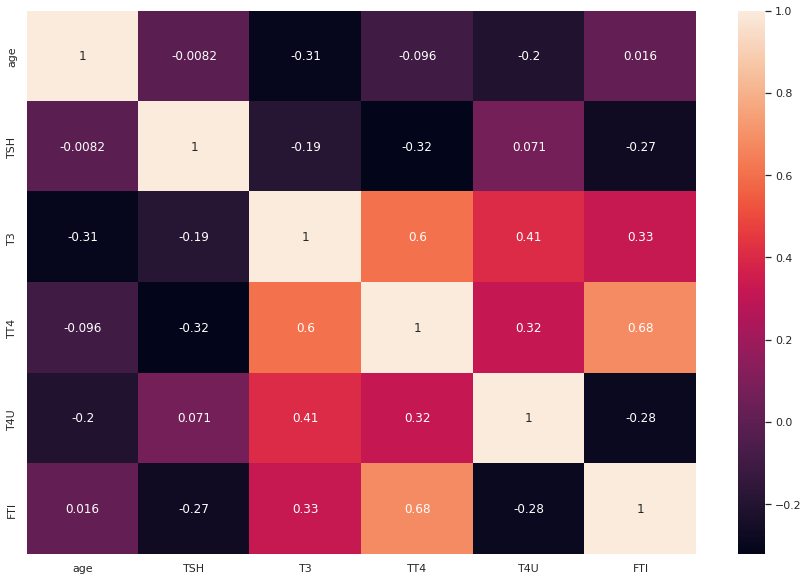

In [95]:
#use a heatmap to viasualize the above correlation
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True)
plt.show()

As expected, the tests have very high correlations with one another 

In [97]:
#let's label encode first
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
categ= ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid','pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured','TT4_measured','T4U_measured', 'FTI_measured', 'TBG_measured','status']
le = LabelEncoder()
ht_df[categ] = ht_df[categ].apply(le.fit_transform)

In [101]:
#I want to see how each of these variables relates with the target variable
ht_df.drop("status", axis=1).apply(lambda x: x.corr(ht_df.status))

age                         -0.035415
sex                          0.023808
on_thyroxine                 0.033652
query_on_thyroxine           0.029785
on_antithyroid_medication    0.013020
thyroid_surgery             -0.041868
query_hypothyroid           -0.047477
query_hyperthyroid           0.025616
pregnant                     0.021306
sick                         0.023216
tumor                        0.025340
lithium                      0.005632
goitre                      -0.010847
TSH_measured                -0.089129
TSH                         -0.586390
T3_measured                 -0.068682
T3                           0.196647
TT4_measured                -0.065451
TT4                          0.377388
T4U_measured                -0.065308
T4U                         -0.081323
FTI_measured                -0.065165
FTI                          0.316932
TBG_measured                 0.050812
dtype: float64

From the above, it can be seen that TSH, T3,TT4,T4U and FTI have very high corelation with one's status. 

**Decision Trees**

In [115]:
#let's split the data sets
from sklearn.model_selection import train_test_split
x = ht_df.drop('status', axis=1)
y = ht_df['status']
#scale the data
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0) 

In [116]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split=5,max_depth=5)
forest=forest.fit(x_train, y_train)

In [117]:
#prediction
y_pred = forest.predict(x_test)

In [118]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print('accuracy_score:' , accuracy_score (y_test,y_pred))

R2 score : 0.55
accuracy_score: 0.982086406743941


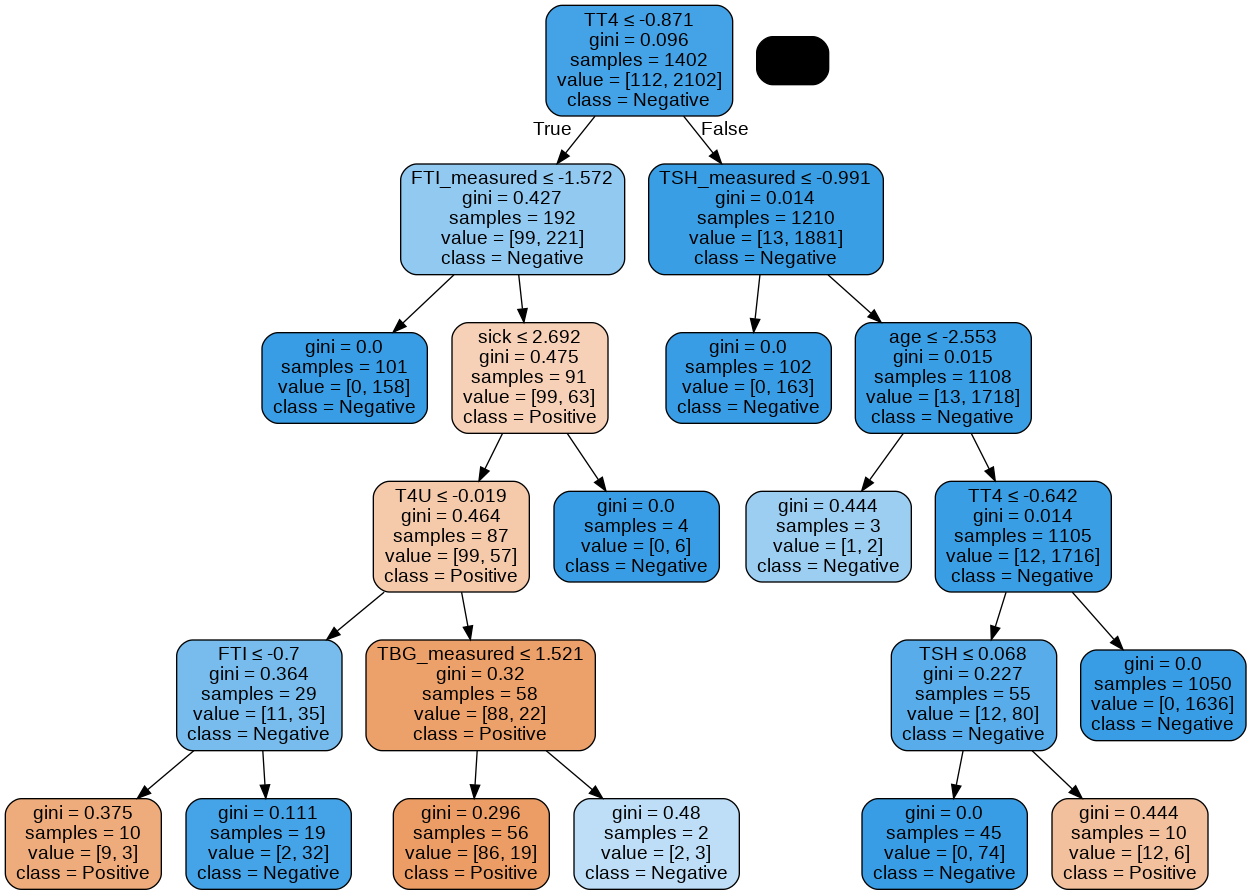

In [119]:
#let's visualize 
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
y_pred = forest.predict(x_test)
tree = forest.estimators_[60]
dot_data = StringIO()
test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features, class_names=['Positive', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('thyroidism.png')
Image(graph.create_png())

From this decision tree, the only important variables in determining the status of one's hypothyroidism is the tests. 

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(x_train, y_train)

y_pred_ada = ada_boost.predict(x_test)

accuracy_score(y_test, y_pred_ada)

0.9884088514225501

In [125]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(x_train, y_train)

y_pred_gbc = gbc.predict(x_test)
accuracy_score(y_test, y_pred_gbc)

0.958904109589041

**Support Vector Machines**

In [120]:
#let's begin with kernel= polynomial 
from sklearn.svm import SVC
#build the model 
polyclassifier = SVC(kernel = 'poly', degree = 15, gamma = 'auto')
polyclassifier.fit(x_train, y_train)
poly_pred = polyclassifier.predict(x_test)
accuracy_score(y_test, poly_pred)

0.9631190727081138

In [121]:
#kernel=linear
from sklearn.svm import SVC
#build the model 
polyclassifier1 = SVC(kernel = 'linear', degree = 15, gamma = 'auto')
polyclassifier1.fit(x_train, y_train)
poly_pred1 = polyclassifier1.predict(x_test)
accuracy_score(y_test, poly_pred1)

0.9768177028451

In [122]:
#kernel=rbf
from sklearn.svm import SVC
#build the model 
polyclassifier2 = SVC(kernel = 'rbf', degree = 15, gamma = 'auto')
polyclassifier2.fit(x_train, y_train)
poly_pred2 = polyclassifier2.predict(x_test)
accuracy_score(y_test, poly_pred2)

0.9768177028451

Follow up questions
Did we have the right data?yes. the data is adequate to answer the questions

Conclusions: All the models were pretty accurate. But the decision trees were the most accurate as they dealt away with the unnecessary features. From our analysis, other variables do not seem to be important. The tests are the most important and shoud be taken most seriously. 